# Test task

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data = pd.read_excel('alfabank_test.xlsx')

In [4]:
data.head(5)

,Main_Trigger,K1,K2,K3,B1,B2,B3,B4,B5,B6,...,B80,B81,B82,B83,B84,B85,B86,B87,B88,B89
0,0,33,62,9017.812923,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,40,64,14438.566200,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,39,63,10845.246083,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
3,0,32,63,7557.193076,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1,30,64,13203.221264,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [5]:
data.tail(2)

,Main_Trigger,K1,K2,K3,B1,B2,B3,B4,B5,B6,...,B80,B81,B82,B83,B84,B85,B86,B87,B88,B89
13201,1,27,63,10767.150030,0,1,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
13202,1,32,63,12278.832378,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [6]:
data.shape

(13203, 93)

In [7]:
data.isnull().sum()

0

Пропущенных значений нет, что приятно

In [8]:
data.describe()

,Main_Trigger,K1,K2,K3,B1,B2,B3,B4,B5,B6,...,B80,B81,B82,B83,B84,B85,B86,B87,B88,B89
count,13203.000000,13203.000000,13203.000000,13203.000000,13203.000000,13203.000000,13203.000000,13203.000000,13203.000000,13203.000000,...,13203.000000,13203.000000,13203.000000,13203.000000,13203.000000,13203.000000,13203.000000,13203.000000,13203.000000,13203.000000
mean,0.342725,35.409983,54.990229,14251.699329,0.482390,0.517610,0.419374,0.467091,0.113535,0.992274,...,0.003938,0.003938,0.002424,0.000076,0.158222,0.261229,0.452246,0.146103,0.118231,0.283420
std,0.474638,9.583872,49.466473,6300.646848,0.499709,0.499709,0.493475,0.498935,0.317257,0.087558,...,0.062636,0.062636,0.049173,0.008703,0.364962,0.439321,0.497733,0.353223,0.322893,0.450676
min,0.000000,15.000000,0.000000,4455.132645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,20.000000,9903.169307,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,34.000000,41.000000,12718.375468,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,41.000000,79.000000,16937.715991,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,75.000000,441.000000,65408.932709,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


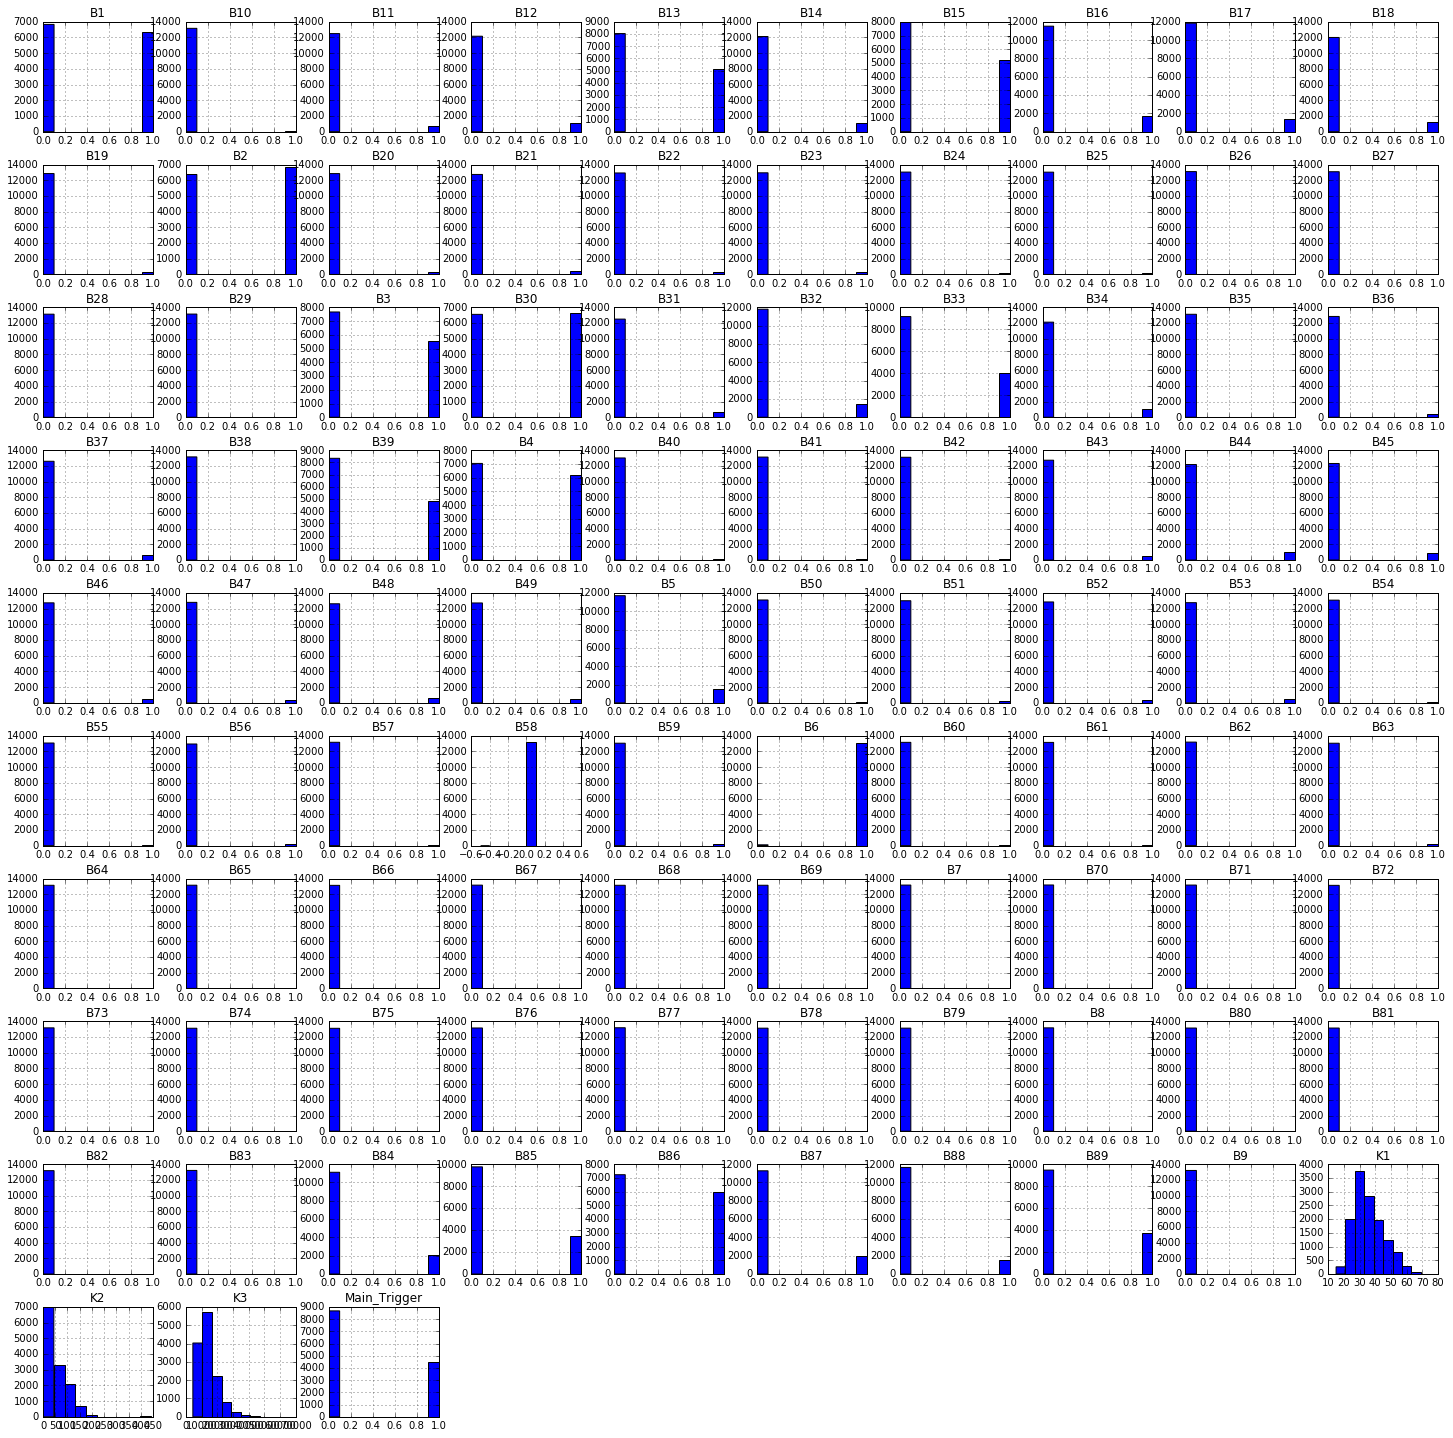

In [9]:
data.hist(figsize=(25, 25));

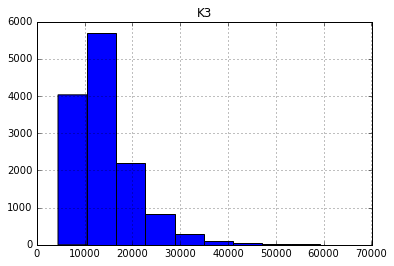

In [10]:
data.K3.hist()
plt.title("K3");

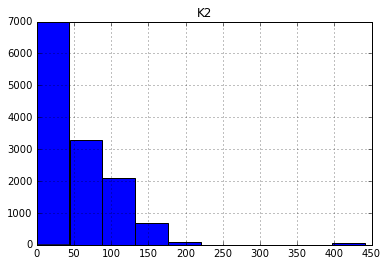

In [11]:
data.K2.hist()
plt.title("K2");

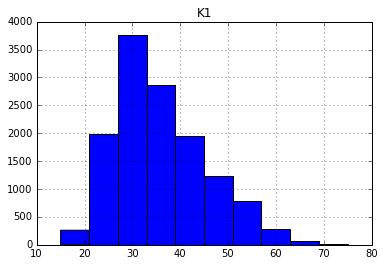

In [12]:
data.K1.hist()
plt.title("K1");

Переменная K3, судя по всему, отвечает за доход, K1 - за возраст, а вот у K2 значения и гистограмма не такие очевидные.
В целом, у большей части переменных крайне низкая дисперсия, в основном принимают значения либо 0, либо 1, так что можно отсеять переменные, у которых вероятность встретить константное значение больше 90%. 

In [13]:
data["K1_2"] = data.K1**2 # раз уж K1 - гарантированный возраст, 
                          # попробую сразу добавить в качестве дополнительной переменной его квадрат,
                          # обычно зависимости, связанные с ним, нелинейны

In [14]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=(.9 * (1 - .9)))
selector.fit(data)
idxs = selector.get_support(indices=True)
data_cleaned = data.ix[:, idxs]

In [15]:
data.Main_Trigger.value_counts()/len(data)

0    0.657275
1    0.342725
Name: Main_Trigger, dtype: float64

Сильного дисбаланса классов нет, можно попробовать обучить модели без over/under сэмплинга. Так как предсказывать будем не вероятности, а сами классы, метрикой для моделей выберу accuracy. Наивный бейзлайн для неё - 0.66, его бы получили, константно предсказывая нули

# Train-Test split

In [24]:
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc

In [17]:
y = data_cleaned.Main_Trigger
X = data_cleaned.drop(["Main_Trigger"], axis=1)

In [18]:
Xtr, Xval, ytr, yval  = train_test_split(X, y, test_size=0.30, random_state=42) # 30% для отложенной выборки

# LogitRegression

Учитывая количество бинарных переменных в датасете, имеет смысл начать именно с логита

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# для логита стандартизуем столбцы K1, K1_2, K2 и K3
Xtr_scaled = np.concatenate([scaler.fit_transform(Xtr[["K1", "K2", "K3", "K1_2"]]), 
                                                  Xtr.drop(["K1", "K2", "K3", "K1_2"], 
                                                           axis=1)], 
                             axis=1)

Xval_scaled = np.concatenate([scaler.transform(Xval[["K1", "K2", "K3", "K1_2"]]), 
                                                  Xval.drop(["K1", "K2", "K3", "K1_2"], 
                                                           axis=1)],
                             axis=1)
                             
lr = LogisticRegression(penalty="l1") # используем l1, чтобы убирать наименее важные признаки
lr.fit(Xtr_scaled, ytr)

print('Train accuracy {}'.format(accuracy_score(ytr, lr.predict(Xtr_scaled))))
print('Validation accuracy {}'.format(accuracy_score(yval, lr.predict(Xval_scaled))))

Train accuracy 0.775697900887
Validation accuracy 0.772027265842


In [28]:
def plot_roc_curve(predictions):
    preds = predictions[:,1]
    fpr, tpr, threshold = roc_curve(yval, preds)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

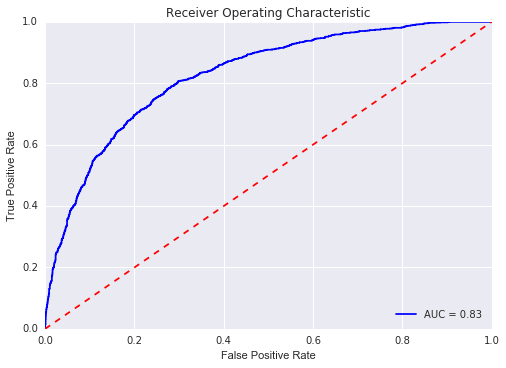

In [65]:
plot_roc_curve(lr.predict_proba(Xval_scaled))

In [30]:
def importance(model):
    
    ### возвращает отсортированные по абсолютному значению коэффициенты
    
    coefs = pd.DataFrame(model.coef_.T, index=Xtr.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    return coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)

In [31]:
def visualize_coefficients(classifier, feature_names, n_top_features=10):
    
    ### визулизирует влияние факторов на целевую переменную
    
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])

    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features), feature_names[interesting_coefficients], rotation=60, ha="right");

In [32]:
importance(lr).head(30)

,coef
B1,-1.760280
K1,1.706674
K3,1.175445
B33,0.771209
B15,0.438055
B16,-0.424236
K2,0.367014
B17,-0.321372
B88,-0.160872
B86,0.146209


Эх, квадрат возраста не зашел

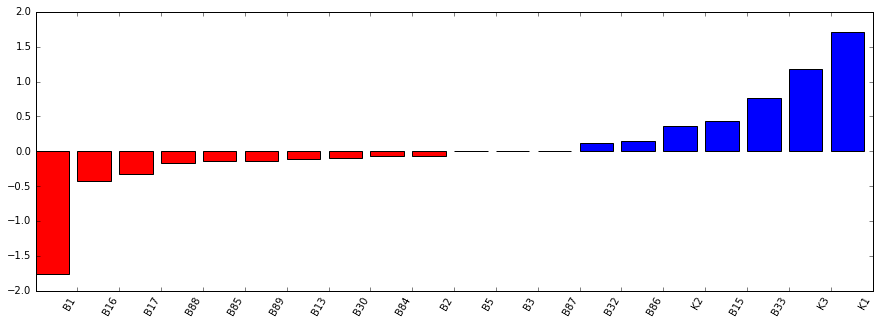

In [33]:
visualize_coefficients(lr, Xtr.columns)

Что ж, доход с возрастом положительно влияют на целевую переменную, возможно, это одобрение кредита (или его возврат). 

Попробуем дополнительно регуляризовать логит

In [42]:
from sklearn.model_selection import GridSearchCV
Cs = 10**np.linspace(-1, 7, num=15)
grid = {'C': Cs}
gridsearch = GridSearchCV(LogisticRegression(penalty="l1"), grid, scoring='roc_auc', cv=5)
%time gridsearch.fit(X, y)

CPU times: user 1min 36s, sys: 474 ms, total: 1min 36s
Wall time: 1min 38s


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-01,   3.72759e-01,   1.38950e+00,   5.17947e+00,
         1.93070e+01,   7.19686e+01,   2.68270e+02,   1.00000e+03,
         3.72759e+03,   1.38950e+04,   5.17947e+04,   1.93070e+05,
         7.19686e+05,   2.68270e+06,   1.00000e+07])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

/Users/dmitrys/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


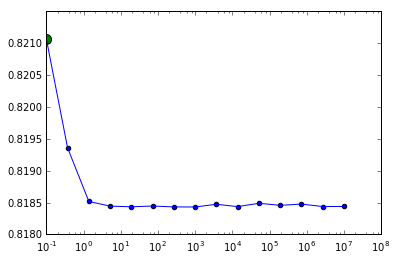

In [43]:
scores = [x.mean_validation_score for x in  gridsearch.grid_scores_]
plt.plot(Cs, scores)
plt.scatter(Cs, scores)
plt.scatter(Cs[np.argmax(scores)], scores[np.argmax(scores)], c='g', s=100)
plt.xscale('log')

In [44]:
C = Cs[np.argmax(scores)]
C

0.10000000000000001

Не похоже, чтобы регуляризация кардинально меняла дело, колебания accuracy не слишком значительны

In [45]:
import seaborn as sns
def plot_confusion(predictions, title):
    array = confusion_matrix(yval, predictions)
    df_cm = pd.DataFrame(array)
    plt.figure(figsize = (3,3))
    sns.heatmap(df_cm, annot=True, fmt='g', cbar=False)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.title(title);

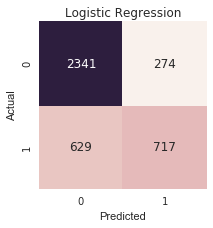

In [46]:
plot_confusion(lr.predict(Xval_scaled), "Logistic Regression")

In [47]:
print(classification_report(lr.predict(Xval_scaled), yval))

             precision    recall  f1-score   support

          0       0.90      0.79      0.84      2970
          1       0.53      0.72      0.61       991

avg / total       0.80      0.77      0.78      3961



Что ж, регуляризованный логит дал accuracy в 0.78, и неплохо определяет нулевой класс, но вот с 1 пока проблемы, False Positive Rate практически 47% и несмотря на полносту в 72%, f1 для первого класса оставляет желать лучшего

Попробуем лес

# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [50]:
rf_params_dist_grid = {
    'max_depth': np.arange(5,14, 2),
    'max_features': np.linspace(0.2, 0.5, 3),
    'min_samples_leaf': np.arange(3,10,2)
}
rf_params_fixed = {
    'random_state': 7,
    'n_estimators': 500,
    'n_jobs': -1
    
}

In [51]:
skf = StratifiedKFold(n_splits=5, random_state=7, shuffle=True)

In [52]:
rf_grid = RandomizedSearchCV(
    n_jobs=-1,
    estimator = RandomForestClassifier(**rf_params_fixed),
    param_distributions = rf_params_dist_grid,
    cv = skf,
    scoring='roc_auc',
    n_iter = 10,
    verbose=True
)

In [53]:
%%time
rf_grid.fit(Xtr, ytr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.4min finished


CPU times: user 5.97 s, sys: 310 ms, total: 6.28 s
Wall time: 2min 26s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=7, shuffle=True),
          error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=7,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'max_features': array([ 0.2 ,  0.35,  0.5 ]), 'max_depth': array([ 5,  7,  9, 11, 13]), 'min_samples_leaf': array([3, 5, 7, 9])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=True)

In [54]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=13, max_features=0.20000000000000001,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [64]:
from sklearn.learning_curve import validation_curve,learning_curve

In [56]:
def plot_with_std(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)
        
def plot_learning_curve(clf, X, y, scoring, cv=5):
 
    train_sizes = np.linspace(0.05, 1, 20)
    n_train, val_train, val_test = learning_curve(clf,
                                                  X, y, train_sizes, cv=cv,
                                                  scoring=scoring, n_jobs = -1)
    plot_with_std(n_train, val_train, label='training scores', c='green')
    plot_with_std(n_train, val_test, label='validation scores', c='red')
    plt.xlabel('Training Set Size'); plt.ylabel(scoring)
    plt.legend()

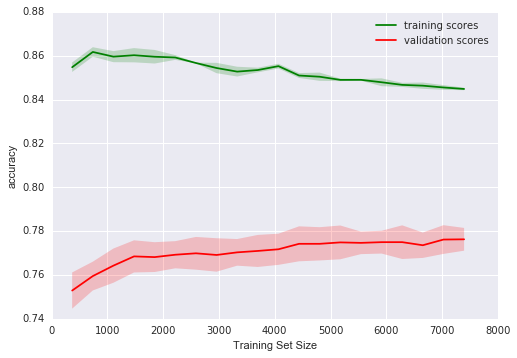

In [57]:
plot_learning_curve(rf_grid.best_estimator_,Xtr, ytr, scoring='accuracy', cv=5)

In [58]:
print('Accuracy: {}'.format(round(rf_grid.best_score_, 3)))

Accuracy: 0.833


In [59]:
rfc = RandomForestClassifier(random_state=42, oob_score=True, n_estimators=500, n_jobs=-1, **rf_grid.best_params_)
rfc.fit(Xtr, ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=13, max_features=0.20000000000000001,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [60]:
rf_importance = pd.DataFrame(rfc.feature_importances_, Xtr.columns)
rf_importance.sort_values(0, ascending=False).head(20)

,0
K3,0.373687
K2,0.186888
K1_2,0.076872
K1,0.076135
B15,0.039929
B13,0.034161
B32,0.028409
B86,0.027727
B30,0.015173
B89,0.014668


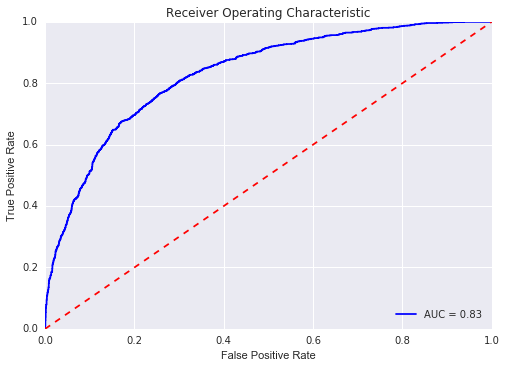

In [61]:
plot_roc_curve(rfc.predict_proba(Xval))

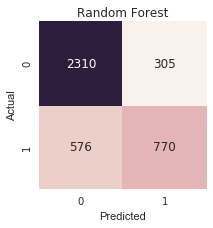

In [62]:
plot_confusion(rfc.predict(Xval), "Random Forest")

In [63]:
print(classification_report(rfc.predict(Xval), yval))

             precision    recall  f1-score   support

          0       0.88      0.80      0.84      2886
          1       0.57      0.72      0.64      1075

avg / total       0.80      0.78      0.78      3961



Для предсказания на тестовой выборке обучим наш откалиброванный лес на всей доступной тренировочной выборке

In [75]:
rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=13, max_features=0.20000000000000001,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [77]:
control_data = pd.read_excel("задание_control.xlsx")

In [78]:
control_data.head()

,id,Main_Trigger,K1,K2,K3,B1,B2,B3,B4,B5,...,B80,B81,B82,B83,B84,B85,B86,B87,B88,B89
0,1,NaN,24,63,10067.655254,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2,NaN,32,64,9957.049920,0,1,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,3,NaN,48,63,9152.635174,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,4,NaN,46,64,11556.520637,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,5,NaN,28,64,8928.119898,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [91]:
control_data.shape

(3364, 94)

In [111]:
control_data_cleaned = control_data.ix[:, idxs].copy()
control_data_cleaned.drop(["Main_Trigger", "id"], axis=1, inplace=True)

In [112]:
control_data_cleaned["K1_2"] = control_data_cleaned.K1 ** 2

In [113]:
control_data_cleaned_scaled = np.concatenate([scaler.transform(control_data_cleaned[["K1", "K2", "K3", "K1_2"]]), 
                                                     control_data_cleaned.drop(["K1", "K2", "K3", "K1_2"], 
                                                           axis=1)],
                                             axis=1)

In [158]:
def plotPredictions(name, model, validation_set, control_set):
    fig = plt.figure(figsize=(5,10))
    
    fig.subplots_adjust(hspace=.2)
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)

    n, bins, patches = ax1.hist(model.predict_proba(validation_set)[:,1])
    ax1.set_title('Predictions of {} on validation'.format(name))

    n, bins, patches = ax2.hist(model.predict_proba(control_set)[:,1])
    ax2.set_xlabel('Probability')
    ax2.set_title('Predictions of {} on control'.format(name))
    plt.show()

Чтобы немного оценить качество модели на контрольной выборке можно посмотреть на распределение предсказанных вероятностей. Так как мы предполагаем, что выборки брались из одной однородной генеральной совокупности, то и форма распределений предсказаний должна у них совпадать

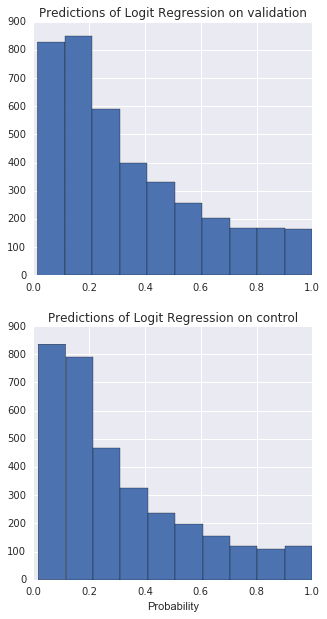

In [160]:
plotPredictions("Logit Regression", lr, Xval_scaled, control_data_cleaned_scaled)

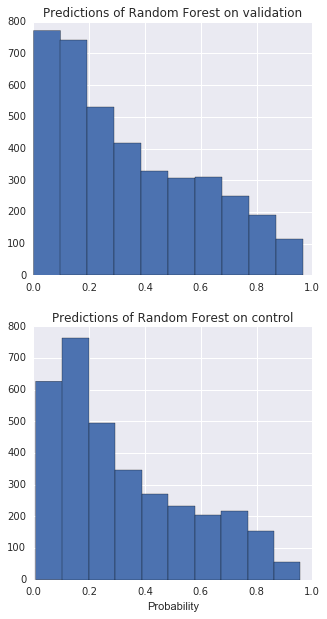

In [161]:
plotPredictions("Random Forest", rfc, Xval, control_data_cleaned)

Формы у распределений действительно схожи, так как по метрикам качества модели практически не отличались, для финального предсказания выберу случайный лес

In [164]:
control_data.Main_Trigger = rfc.predict_proba(control_data_cleaned)[:,1]

In [165]:
control_data.head()

,id,Main_Trigger,K1,K2,K3,B1,B2,B3,B4,B5,...,B80,B81,B82,B83,B84,B85,B86,B87,B88,B89
0,1,0.204461,24,63,10067.655254,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2,0.210897,32,64,9957.049920,0,1,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,3,0.346399,48,63,9152.635174,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,4,0.205746,46,64,11556.520637,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0.192353,28,64,8928.119898,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [170]:
control_data.to_excel("final_solution_alfabank.xlsx")

**Дальнейшие действия:**

- попробовать другие методы отбора факторов, рекурсивный, PCA, model-based, так как в текущем варианте часть информации может теряться, а часть дублироваться из-за потенциальной мультиколлинеарности
- добавить в качестве признаков линейные и нелинейные комбинации текущих переменных (если бы они были деанонимизированы, можно было бы такие действия проводить более осознанно)
- уделить внимание поиску и удалению выбросов в данных, например, в переменной K2 явно есть несколько нестандартных значений, составляющих длинный правый хвост у распределения
- попробовать нивелировать дисбаланс классов при обучении, применить over/under sampling
- посмотреть на качество других моделей, несмотря на то, что при превалировании бинарных переменных логит будет наилучшим выходом, можно попробовать построить модели, основанные на схожести объектов, например, kNN, или постараться улучшить качество предсказаний по деревьям при помощи бустинга, и т.д.
- наконец, построить ансамбль из различных моделей, который может повысить качество предсказаний в ущерб интерпретируемости, особенно в случае некоррелированности предсказаний отдельных классификаторов